### *DATA COLLECTION*

In [67]:
!pip install praw

SECRET="qlCtfklBVpaGoWQtJtHwSBSE4LULyQ"
APP_ID="8hM5E6PgKPm9A9zNJRdErw"
import praw
import pprint
import pandas as pd
from praw.models import MoreComments
from datetime import datetime

SECRET="X0rIaQ7gOera_Vy3RzP796hf2AMhBw"
APP_ID="lVns2R2WSLPGqXnIg5Dltw"

reddit = praw.Reddit(
    client_id=APP_ID,
    client_secret=SECRET,
    user_agent="Comment Extraction"
)

SUBMISSION_URL = ["https://www.reddit.com/r/soccer/comments/158q9y1/akabas_inter_miami_have_added_11_million/"
,"https://www.reddit.com/r/soccer/comments/14ctvcv/beinsports_messi_i_have_achieved_everything_in/"
,"https://www.reddit.com/r/soccer/comments/150isaf/official_inter_miami_confirms_leo_messi_signing/"
,"https://www.reddit.com/r/soccer/comments/156ev3v/david_beckham_in_tears_after_lionel_messis_last/"]
# DATAPREPARATION

# Merging Data from across multiple sources
rows = []
for url in SUBMISSION_URL:

  submission = reddit.submission(url=url)
  for n, comment in enumerate(submission.comments.list()):
    if n == 1000:
      break
    if isinstance(comment, MoreComments):
      continue
    if not comment.author: # not all comments have an author
      continue


    row = {"author": comment.author.name,
          "body": comment.body,
          "n_words": len(comment.body.split()),
           "time": comment.created_utc,
           "up_votes" : comment.score,
           }
    rows.append(row)

def count_characters(row):
  return len(row.body)
df = pd.DataFrame(rows)

# add a column containing the character count
df["chars"] = df.apply(count_characters, axis=1)
print(df)

# summary statistics
print(df["chars"].min(), df["chars"].max(), df["chars"].mean())

#df.to_csv("comments-dataset.csv")

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



              author                                               body  \
0      AutoModerator  **This is a stats thread. Remember that there'...   
1     MilesHighClub_  Missed the most important one\n\nInter Miami h...   
2         ParisLake2  **The most followed (instagram) sports team in...   
3           WelpSigh  no player is bigger than the club, except this...   
4      sullivan_tire  As a basketball fan, this really puts the impa...   
...              ...                                                ...   
1876            eri-  No worries, its an academic exercise pretty mu...   
1877      ChillPalis                                I love Pennsylvania   
1878      ChillPalis                                            Oh nahh   
1879  neikawaaratake  Yeah. I am not saying Beckham was better. Zida...   
1880    Biscotti-Old  I think they're refering to MLS ticket prices,...   

      n_words          time  up_votes  chars  
0          66  1.690240e+09         1    406  
1    

## ***DATA PRE-PROCESSING***

In [68]:
df.shape

(1881, 6)

In [69]:
df.head()

,author,body,n_words,time,up_votes,chars
0,AutoModerator,**This is a stats thread. Remember that there'...,66,1.690240e+09,1,406
1,MilesHighClub_,Missed the most important one\n\nInter Miami h...,13,1.690242e+09,2772,78
2,ParisLake2,**The most followed (instagram) sports team in...,50,1.690240e+09,1229,312
3,WelpSigh,"no player is bigger than the club, except this...",13,1.690242e+09,902,67
4,sullivan_tire,"As a basketball fan, this really puts the impa...",15,1.690241e+09,310,87


In [70]:
df.dtypes

author       object
body         object
n_words       int64
time        float64
up_votes      int64
chars         int64
dtype: object

In [71]:
from datetime import datetime
df["time"] = df["time"].astype(int)

In [72]:
df.head()

,author,body,n_words,time,up_votes,chars
0,AutoModerator,**This is a stats thread. Remember that there'...,66,1690240025,1,406
1,MilesHighClub_,Missed the most important one\n\nInter Miami h...,13,1690241835,2772,78
2,ParisLake2,**The most followed (instagram) sports team in...,50,1690240118,1229,312
3,WelpSigh,"no player is bigger than the club, except this...",13,1690242167,902,67
4,sullivan_tire,"As a basketball fan, this really puts the impa...",15,1690240820,310,87


In [73]:
#df["time"] = datetime.utcfromtimestamp(df["time"]).strftime('%Y-%m-%d %H:%M:%S')

df["time"] = df["time"].apply(lambda value: datetime.utcfromtimestamp(value).strftime('%Y-%m-%d %H:%M:%S'))

In [74]:
df.head()

,author,body,n_words,time,up_votes,chars
0,AutoModerator,**This is a stats thread. Remember that there'...,66,2023-07-24 23:07:05,1,406
1,MilesHighClub_,Missed the most important one\n\nInter Miami h...,13,2023-07-24 23:37:15,2772,78
2,ParisLake2,**The most followed (instagram) sports team in...,50,2023-07-24 23:08:38,1229,312
3,WelpSigh,"no player is bigger than the club, except this...",13,2023-07-24 23:42:47,902,67
4,sullivan_tire,"As a basketball fan, this really puts the impa...",15,2023-07-24 23:20:20,310,87


In [75]:
df.dtypes

author      object
body        object
n_words      int64
time        object
up_votes     int64
chars        int64
dtype: object

In [76]:
df["time"] = pd.to_datetime(df["time"])

In [77]:
df.dtypes

author              object
body                object
n_words              int64
time        datetime64[ns]
up_votes             int64
chars                int64
dtype: object

In [78]:
df["time"].max()

Timestamp('2023-08-02 18:59:03')

In [79]:
df["time"].min()

Timestamp('2023-06-18 20:12:21')

In [80]:
# Expansion of contractions

!pip install contractions
import contractions
def text_with_contractions(text):
  words = []
  for word in text.split():
    words.append(contractions.fix(word))
  return text

# for text in texts:
 # text = text_with_contractions(text)
 # print(text)

In [81]:
# Common Case

def common_case(text):
  return text.lower()

In [82]:
# Text Substitution
import re
def replace_markers(text):
  pattern = r"\$\d+"
  text = re.sub(pattern, "${price}", text)
  return text

In [83]:
def remove_asterisk(text):
    text = text.replace('*', '')
    return text

In [84]:
# Link Removal

import re
def replace_http_links(text):
  pattern = r"(https://|http://)[A-Za-z0-9\/\.]+"
  text = re.sub(pattern, "${link}", text)
  return text

In [85]:
def no_http_links(text):
  keep = []
  for word in text.split():
    if not word.startswith("http"):
      keep.append(word)
  return text

In [86]:
# Tokenzation

import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
def text_to_tokens(text):
    tokens = []
    for sentance in sent_tokenize(text):
      for word in word_tokenize(sentance):
        tokens.append(word)
    return tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [87]:
# Stopwords Removal **

import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")

def tokens_without_stopwords(tokens):
  keep = []
  for token in tokens:
    if not token in stopwords.words("english"):
      keep.append(token)
  return keep

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [88]:
# Lemmatisation

import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

def apply_lemmatisation(tokens):
  keep = []
  lemmatizer = WordNetLemmatizer()
  for token in tokens:
    keep.append(lemmatizer.lemmatize(token))
  return keep

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [89]:
def without_leading_trailing_whitespace(text):
  return text.strip()

In [90]:
import re
def no_multi_punctuation(text):
  pattern = r"\!+"
  text = re.sub(pattern, "!", text)
  pattern = r"\?+"
  text = re.sub(pattern, "?", text)
  return text

In [91]:
# Applying all together
def preprocessing_pipeline(row):
  text = row["body"]
  text = text_with_contractions(text)
  text = common_case(text)
  text = replace_markers(text)
  text = remove_asterisk(text)
  text = replace_http_links(text)
  text = without_leading_trailing_whitespace(text)
  text = no_multi_punctuation(text)
  text = no_http_links(text)
  tokens = text_to_tokens(text)
  tokens = tokens_without_stopwords(tokens)
  tokens = apply_lemmatisation(tokens)

  prepared_text = ' '.join(tokens)
  return prepared_text

df["cleaned_body"] = df.apply(preprocessing_pipeline, axis=1)
df

,author,body,n_words,time,up_votes,chars,cleaned_body
0,AutoModerator,**This is a stats thread. Remember that there'...,66,2023-07-24 23:07:05,1,406,stats thread . remember 's one stat post allow...
1,MilesHighClub_,Missed the most important one\n\nInter Miami h...,13,2023-07-24 23:37:15,2772,78,missed important one inter miami follower inte...
2,ParisLake2,**The most followed (instagram) sports team in...,50,2023-07-24 23:08:38,1229,312,followed ( instagram ) sport team north americ...
3,WelpSigh,"no player is bigger than the club, except this...",13,2023-07-24 23:42:47,902,67,"player bigger club , except player club"
4,sullivan_tire,"As a basketball fan, this really puts the impa...",15,2023-07-24 23:20:20,310,87,"basketball fan , really put impact football pe..."
...,...,...,...,...,...,...,...
1876,eri-,"No worries, its an academic exercise pretty mu...",39,2023-07-22 16:14:51,0,217,"worry , academic exercise pretty much , since ..."
1877,ChillPalis,I love Pennsylvania,3,2023-07-22 19:46:32,2,19,love pennsylvania
1878,ChillPalis,Oh nahh,2,2023-07-22 19:46:02,2,7,oh nahh
1879,neikawaaratake,Yeah. I am not saying Beckham was better. Zida...,62,2023-07-22 14:36:32,1,322,yeah . saying beckham better . zidane definite...


In [92]:
# Removing data where the text length is below 10 chars
df = df[df["chars"] >= 10].copy()

In [93]:
df.isna().sum()

author          0
body            0
n_words         0
time            0
up_votes        0
chars           0
cleaned_body    0
dtype: int64

In [94]:
#df.to_csv("try.csv")

<Axes: >

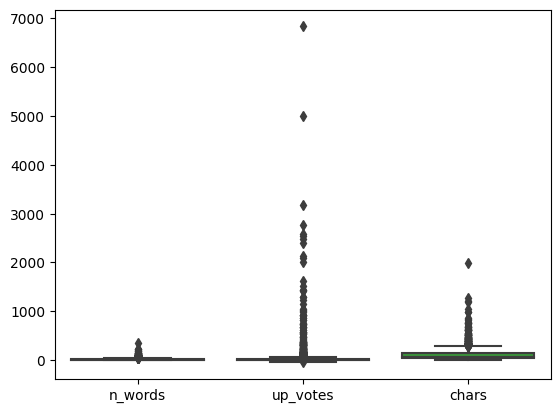

In [95]:
import seaborn as sns
sns.boxplot(df)

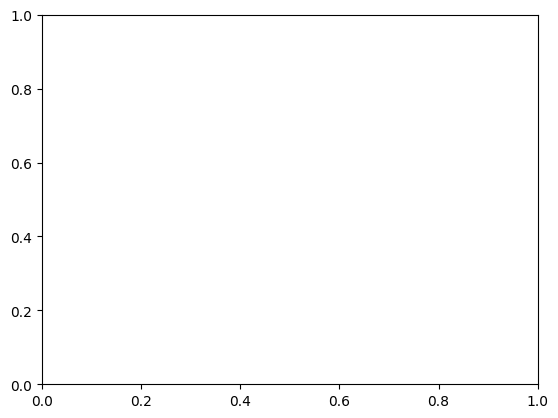

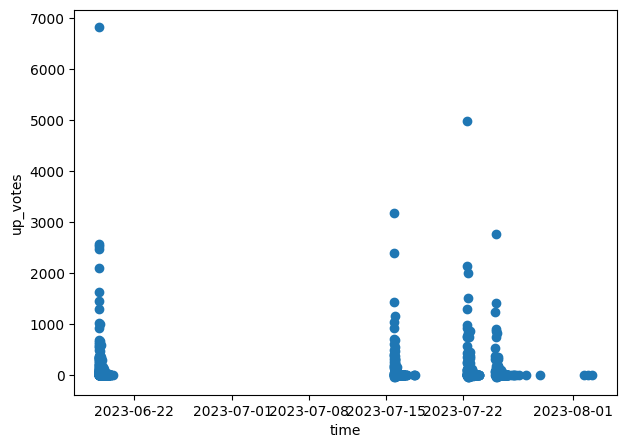

In [96]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(df['time'], df['up_votes'])

# x-axis label
ax.set_xlabel('time')

# y-axis label
ax.set_ylabel('up_votes')
plt.show()

In [97]:
df.drop(df.loc[df['up_votes']>4800].index, inplace=True)

print("New Shape: ", df.shape)

New Shape:  (1819, 7)


<Axes: >

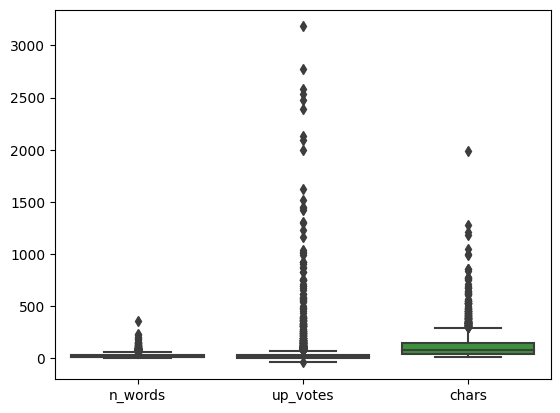

In [98]:
import seaborn as sns
sns.boxplot(df)

# ***EXPLORATORY ANALYSIS***

In [99]:
!pip install langdetect
from langdetect import detect

def language_code(row):
  try:
    return detect(row["cleaned_body"])
  except:
    return "Unknown"

df["lang"] = df.apply(language_code, axis=1)
df

,author,body,n_words,time,up_votes,chars,cleaned_body,lang
0,AutoModerator,**This is a stats thread. Remember that there'...,66,2023-07-24 23:07:05,1,406,stats thread . remember 's one stat post allow...,en
1,MilesHighClub_,Missed the most important one\n\nInter Miami h...,13,2023-07-24 23:37:15,2772,78,missed important one inter miami follower inte...,en
2,ParisLake2,**The most followed (instagram) sports team in...,50,2023-07-24 23:08:38,1229,312,followed ( instagram ) sport team north americ...,en
3,WelpSigh,"no player is bigger than the club, except this...",13,2023-07-24 23:42:47,902,67,"player bigger club , except player club",en
4,sullivan_tire,"As a basketball fan, this really puts the impa...",15,2023-07-24 23:20:20,310,87,"basketball fan , really put impact football pe...",en
...,...,...,...,...,...,...,...,...
1875,FifaIsGoingToKillMe,"Actually it’s fulbo, loco haha. I’ve been in t...",26,2023-07-22 15:22:31,11,124,"actually ’ fulbo , loco haha . ’ u life tend s...",en
1876,eri-,"No worries, its an academic exercise pretty mu...",39,2023-07-22 16:14:51,0,217,"worry , academic exercise pretty much , since ...",en
1877,ChillPalis,I love Pennsylvania,3,2023-07-22 19:46:32,2,19,love pennsylvania,no
1879,neikawaaratake,Yeah. I am not saying Beckham was better. Zida...,62,2023-07-22 14:36:32,1,322,yeah . saying beckham better . zidane definite...,en


In [100]:
# Identifying the most commonly used languages
df["lang"].value_counts().head(10)

en    1376
it      54
fr      46
es      36
af      34
no      25
ro      25
cy      23
da      21
et      19
Name: lang, dtype: int64

In [101]:
# Identifying the least commonly used languages
df["lang"].value_counts().tail(10)

sk         5
Unknown    4
sq         4
lt         3
cs         3
hu         2
tr         2
vi         2
lv         1
pt         1
Name: lang, dtype: int64

<Axes: title={'center': 'Comment Frequency by (Non-English) Langauges'}, xlabel='Language Code', ylabel='Freqeuncy'>

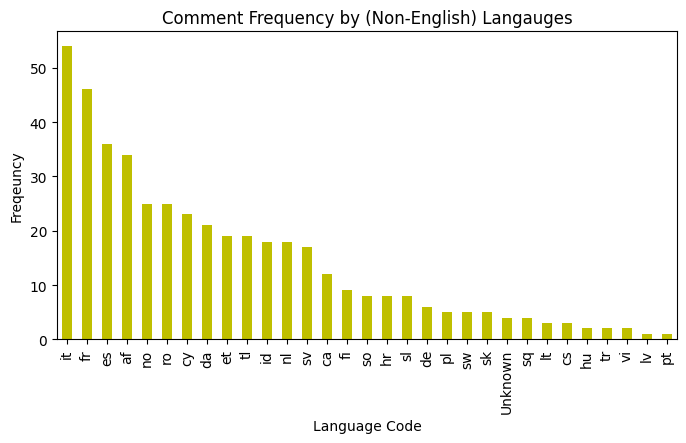

In [102]:
df["lang"].value_counts().iloc[1:].plot(kind="bar",figsize=(8,4),color ='y',
                                        title="Comment Frequency by (Non-English) Langauges",
                                        xlabel= "Language Code",
                                        ylabel= "Freqeuncy")

# *Descriptives*

In [103]:
df.describe()

,n_words,up_votes,chars
count,1819.000000,1819.000000,1819.000000
mean,21.534360,60.996152,118.601979
std,24.714882,226.323778,138.115188
min,1.000000,-41.000000,10.000000
25%,7.000000,2.000000,40.000000
50%,14.000000,8.000000,76.000000
75%,26.000000,30.000000,141.000000
max,354.000000,3183.000000,1985.000000


array([[<Axes: title={'center': 'n_words'}>,
        <Axes: title={'center': 'time'}>],
       [<Axes: title={'center': 'up_votes'}>,
        <Axes: title={'center': 'chars'}>]], dtype=object)

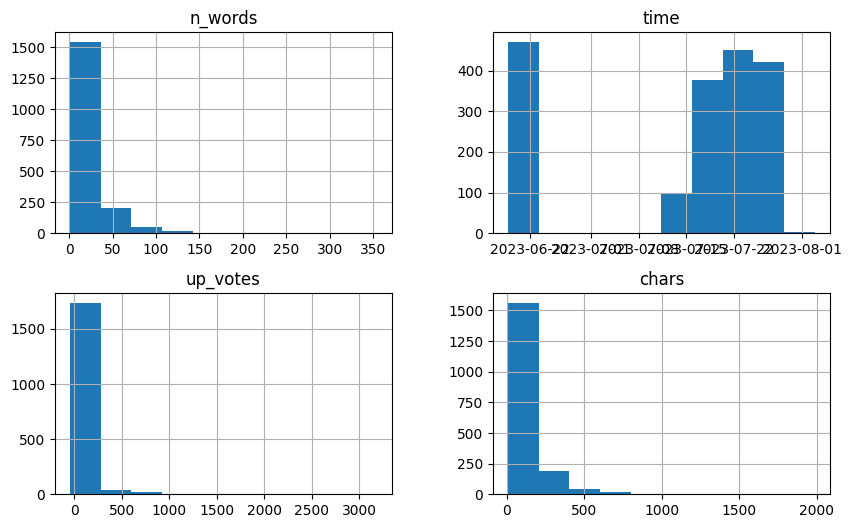

In [104]:
df.hist(figsize=(10, 6))

In [105]:
df["chars"].describe()

count    1819.000000
mean      118.601979
std       138.115188
min        10.000000
25%        40.000000
50%        76.000000
75%       141.000000
max      1985.000000
Name: chars, dtype: float64

In [106]:
df["chars"].mode()

0    31
Name: chars, dtype: int64

In [107]:
df["n_words"].mode()

0    7
Name: n_words, dtype: int64

<Axes: title={'center': 'Avg Chars Number by Language'}, xlabel='Language', ylabel='Chars'>

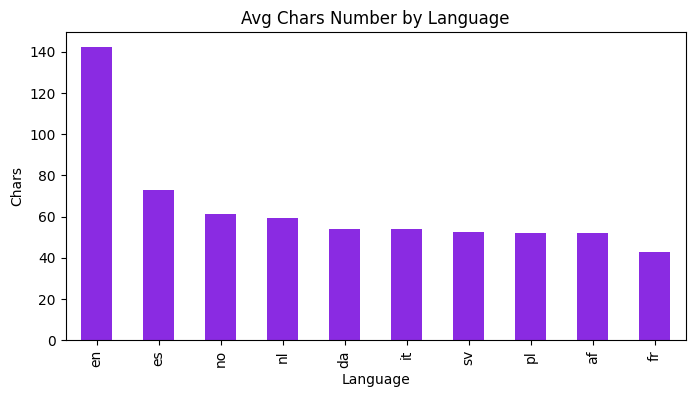

In [108]:
df.groupby("lang")["chars"].mean().sort_values(ascending=False).head(10).plot(
    kind="bar", figsize=(8,4) ,color ='blueviolet',
                                        title="Avg Chars Number by Language",
                                        xlabel= "Language",
                                        ylabel= "Chars")

<Axes: title={'center': 'Avg Up Votes Number by Language'}, xlabel='Language', ylabel='Up Votes'>

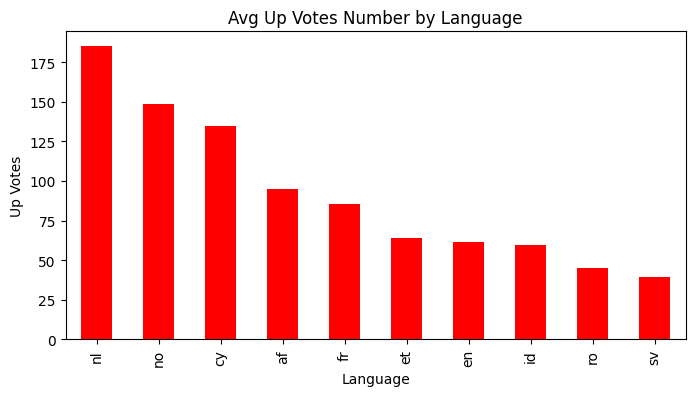

In [109]:
df.groupby("lang")["up_votes"].mean().sort_values(ascending=False).head(10).plot(
    kind="bar", figsize=(8,4) ,color ='red',
                                        title="Avg Up Votes Number by Language",
                                        xlabel= "Language",
                                        ylabel= "Up Votes")

<Axes: title={'center': 'Best Comments (Based on Up votes) by Language'}, xlabel='Up Votes', ylabel=' '>

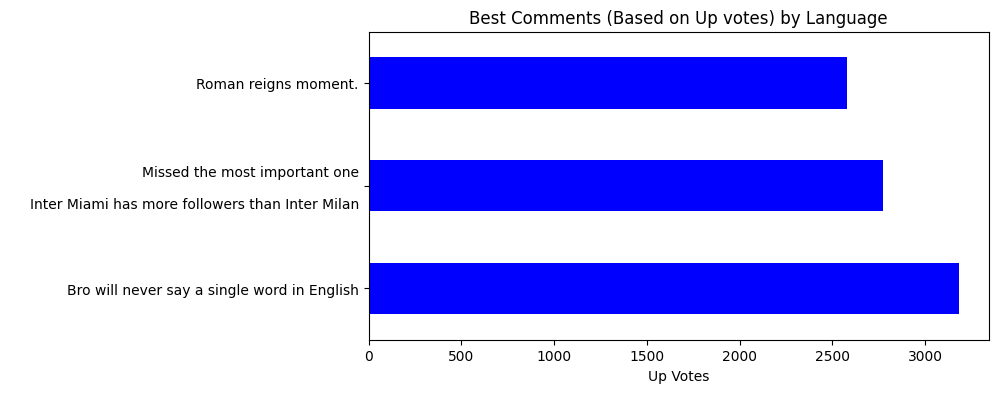

In [110]:
df.groupby("body")["up_votes"].max().sort_values(ascending=False).head(3).plot(
    kind="barh", figsize=(8,4) ,color ='blue',
                                        title="Best Comments (Based on Up votes) by Language",
                                        xlabel= "Up Votes",
                                        ylabel= " ")

<Axes: title={'center': 'Worst Comments (Based on Up votes) by Language'}, xlabel='Up Votes', ylabel=' '>

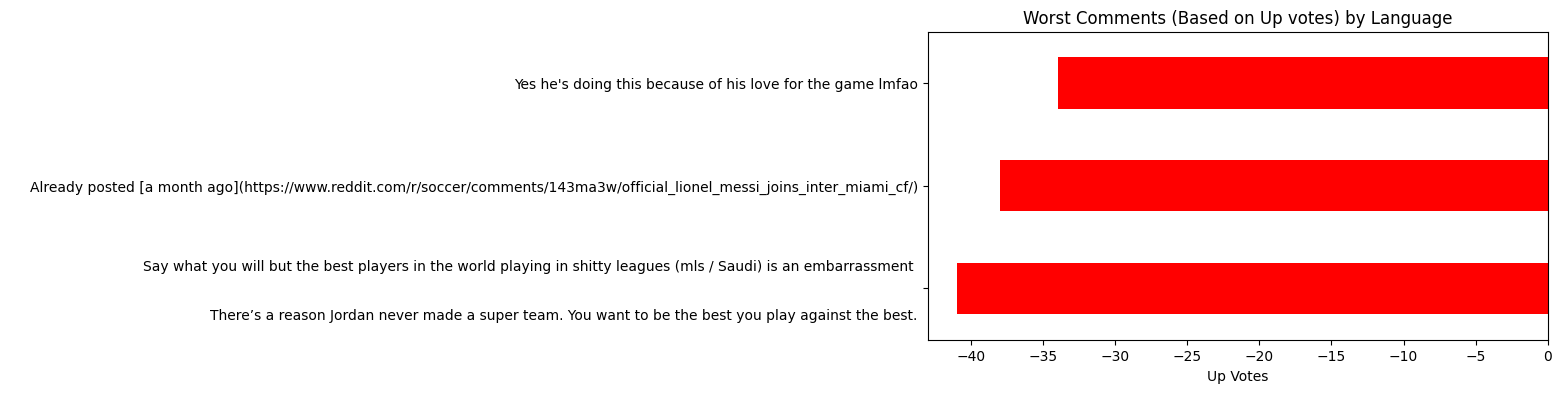

In [111]:
df.groupby("body")["up_votes"].min().sort_values(ascending=True).head(3).plot(
    kind="barh", figsize=(8,4) ,color ='red',
                                        title="Worst Comments (Based on Up votes) by Language",
                                        xlabel= "Up Votes",
                                        ylabel= " ")

In [112]:
df.groupby("body")["n_words"].max().sort_values(ascending=False).head(1)

body
Really interesting. I completely disagree. My opinion is actually that it is the exact other way around; Beckham was much better at football than Tyson was at boxing. \n\nI have followed both sports as a fan for decades, so I believe I have enough perspective to give a solid case for this opinion. \n\nNow, we must first recognise that this comparison is inherently flawed, as the individual and team nature of each sport makes it almost impossible and unfair for each side, depending on how you frame it. \n\nThe problem with Tyson's legacy - as all boxing fans will tell you - is that he failed every single test on the big stage against the ATGs of his generation. Additionally, it is very probably that he would have lost against 2 other great boxers from his generation, had he fought them. \n\n1. None of the above can be said about Beckham, he has stepped up on the big stage and won against all the best of his generation with the exception of winning with England (here you have the pr

<Axes: title={'center': 'Best Up Votes Number by Author'}, xlabel='Language', ylabel='Author'>

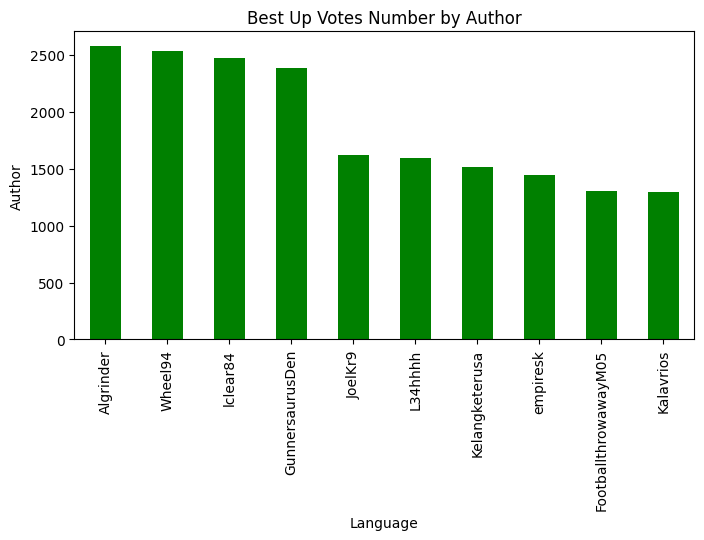

In [113]:
df.groupby("author")["up_votes"].mean().sort_values(ascending=False).head(10).plot(
    kind="bar", figsize=(8,4) ,color ='green',
                                        title="Best Up Votes Number by Author",
                                        xlabel= "Language",
                                        ylabel= "Author")

<Axes: title={'center': 'Worst Up Votes Number by Author'}, xlabel='Author', ylabel='Up Votes'>

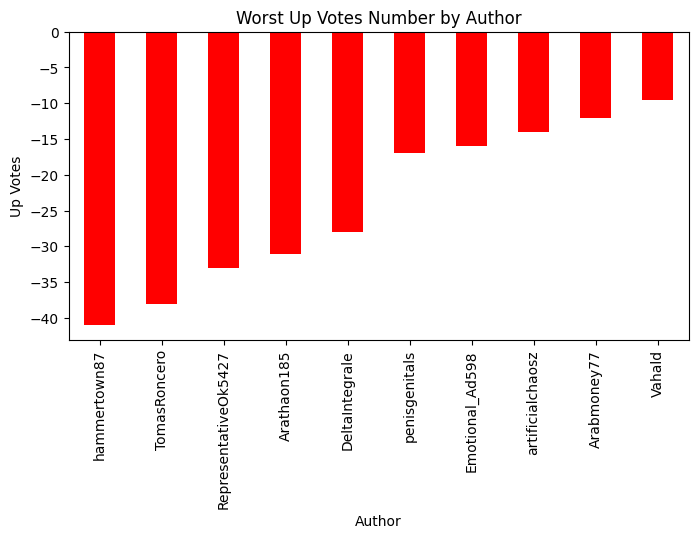

In [114]:
df.groupby("author")["up_votes"].mean().sort_values(ascending=True).head(10).plot(
    kind="bar", figsize=(8,4) ,color ='red',
                                        title="Worst Up Votes Number by Author",
                                        xlabel= "Author",
                                        ylabel= "Up Votes")

<Axes: title={'center': 'comments posted over time'}, xlabel='date', ylabel='comments'>

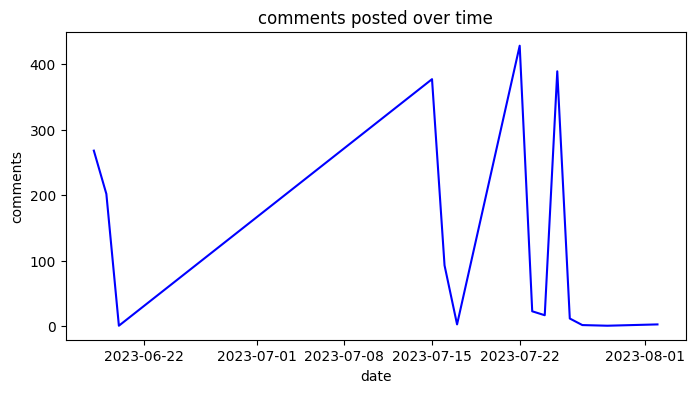

In [115]:
df.groupby(df["time"].dt.date).size().plot( figsize=(8,4),
    title="comments posted over time",ylabel="comments", xlabel="date", color="b")

<Axes: title={'center': 'no. comments posted by the top 15 authors'}, xlabel='author', ylabel='comments'>

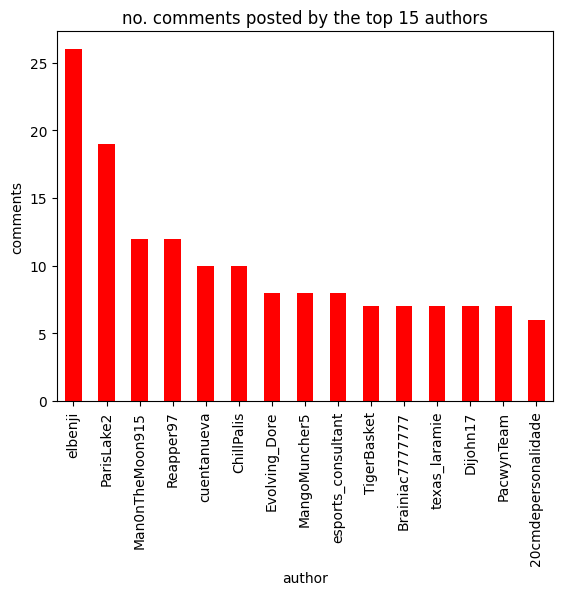

In [116]:
df.groupby(df["author"]).size().sort_values(ascending=False).iloc[0:15].plot(kind="bar", ylabel="comments",
      title="no. comments posted by the top 15 authors", color="r")

In [117]:
from collections import Counter

word_counter = Counter()
for row in df.to_dict("records"):
  word_counter.update(row["cleaned_body"].split())
df_tf = pd.DataFrame(word_counter.most_common(30))
df_tf.columns = ["term", "frequency"]
#df_tf
df_tf.transpose()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
term,.,",",’,'s,messi,?,n't,like,miami,would,...,world,football,fan,get,think,sport,player,know,ml,''
frequency,1903,1252,411,375,263,262,260,197,166,164,...,107,106,105,101,100,98,95,91,90,90


In [118]:
df = df[df["lang"]=="en"].copy()

In [119]:
df

,author,body,n_words,time,up_votes,chars,cleaned_body,lang
0,AutoModerator,**This is a stats thread. Remember that there'...,66,2023-07-24 23:07:05,1,406,stats thread . remember 's one stat post allow...,en
1,MilesHighClub_,Missed the most important one\n\nInter Miami h...,13,2023-07-24 23:37:15,2772,78,missed important one inter miami follower inte...,en
2,ParisLake2,**The most followed (instagram) sports team in...,50,2023-07-24 23:08:38,1229,312,followed ( instagram ) sport team north americ...,en
3,WelpSigh,"no player is bigger than the club, except this...",13,2023-07-24 23:42:47,902,67,"player bigger club , except player club",en
4,sullivan_tire,"As a basketball fan, this really puts the impa...",15,2023-07-24 23:20:20,310,87,"basketball fan , really put impact football pe...",en
...,...,...,...,...,...,...,...,...
1874,Diagonalizer,i think in today's world fewer people know who...,34,2023-07-22 18:39:42,2,183,think today 's world fewer people know alexand...,en
1875,FifaIsGoingToKillMe,"Actually it’s fulbo, loco haha. I’ve been in t...",26,2023-07-22 15:22:31,11,124,"actually ’ fulbo , loco haha . ’ u life tend s...",en
1876,eri-,"No worries, its an academic exercise pretty mu...",39,2023-07-22 16:14:51,0,217,"worry , academic exercise pretty much , since ...",en
1879,neikawaaratake,Yeah. I am not saying Beckham was better. Zida...,62,2023-07-22 14:36:32,1,322,yeah . saying beckham better . zidane definite...,en


In [120]:

df["time"].min()

Timestamp('2023-06-18 20:12:21')

In [121]:
df["time"].max()

Timestamp('2023-08-02 18:59:03')

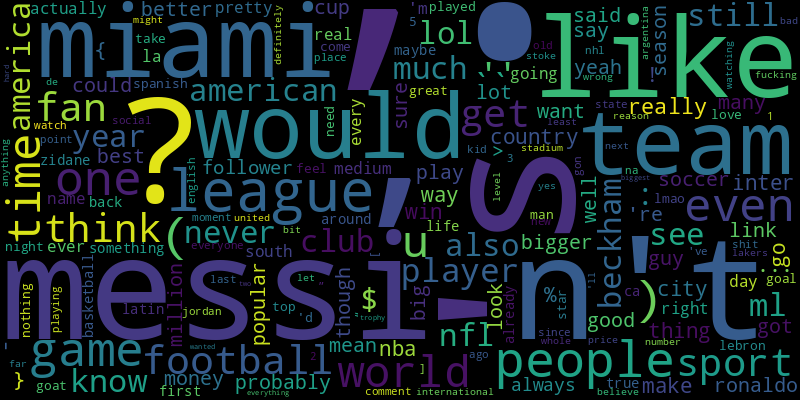

In [122]:
!pip install wordcloud
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=400)
cloud.generate_from_frequencies(dict(word_counter.most_common(300)))
image = cloud.to_image()
image

In [123]:
#the number of individualcomments where the term "messi" is mentioned
df[df["cleaned_body"].str.contains("messi")]["cleaned_body"].size

202

In [124]:
#the number of individualcomments where the term "messi" is mentioned
df[df["cleaned_body"].str.contains("ronaldo")]["cleaned_body"].size

33

In [125]:
#the number of individualcomments where the term "messi" is mentioned
df[df["cleaned_body"].str.contains("beckham")]["cleaned_body"].size

55

In [126]:
#the number of individualcomments where the term "messi" is mentioned
df[df["cleaned_body"].str.contains("zidane")]["cleaned_body"].size

22

# ***Word Clouds***

In [127]:
def create_WordCloud(data, title=None):
    wordcloud = WordCloud(width = 500, height = 500,
                          background_color ='white',
                          min_font_size = 15
                         ).generate(" ".join(data.values))

    plt.figure(figsize = (5, 5), facecolor = None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(title,fontsize=20)
    plt.show()

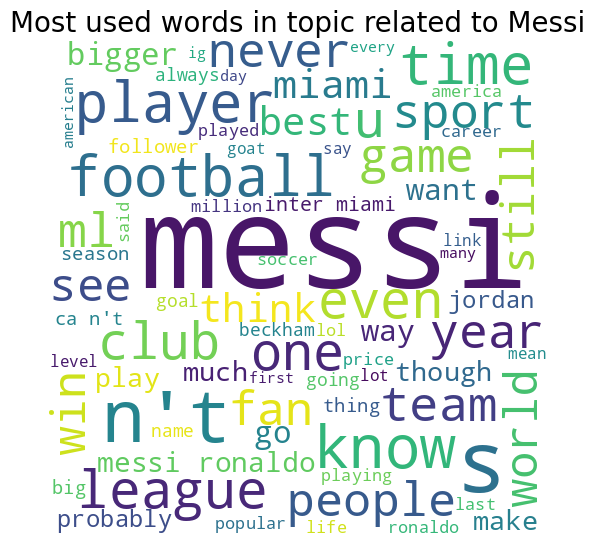

In [128]:
create_WordCloud(df[df["cleaned_body"].str.contains("messi")]["cleaned_body"], title="Most used words in topic related to Messi")

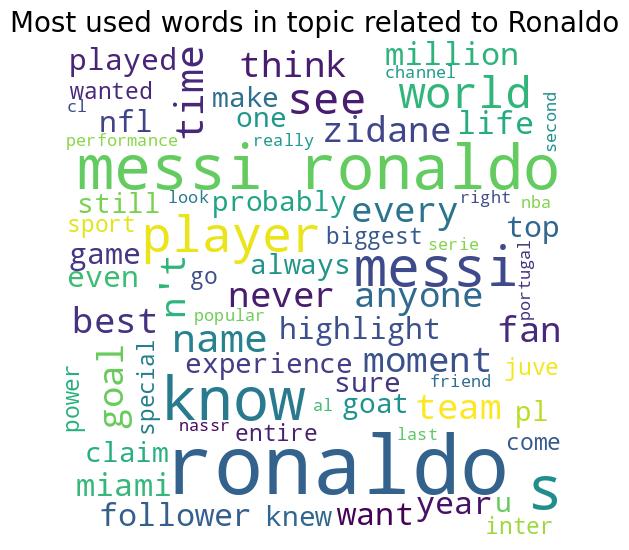

In [129]:
create_WordCloud(df[df["cleaned_body"].str.contains("ronaldo")]["cleaned_body"], title="Most used words in topic related to Ronaldo")

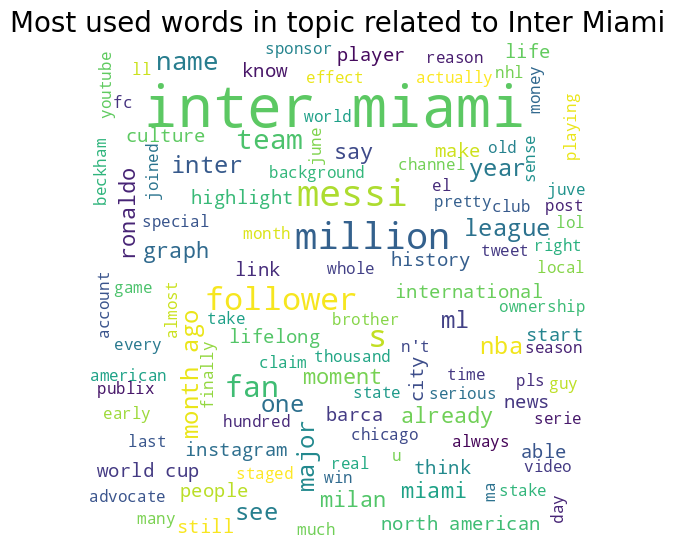

In [130]:
create_WordCloud(df[df["cleaned_body"].str.contains("inter miami")]["cleaned_body"], title="Most used words in topic related to Inter Miami")

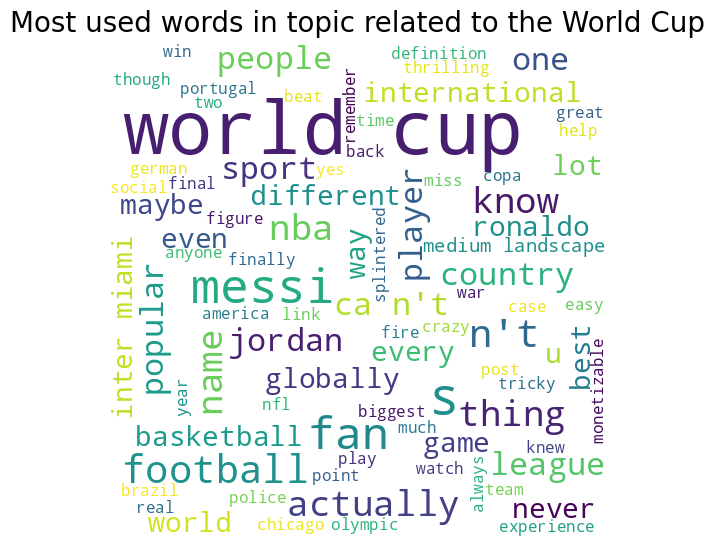

In [131]:
create_WordCloud(df[df["cleaned_body"].str.contains("world cup")]["cleaned_body"], title="Most used words in topic related to the World Cup")

## ***Noun Phrase Extraction***

In [132]:
import nltk
nltk.download('brown')
nltk.download('punkt')
from collections import Counter
from textblob import TextBlob

noun_counter = Counter()
for word in df["cleaned_body"].to_list():
  blob = TextBlob(word)
  noun_counter.update(blob.noun_phrases)

for np in noun_counter.most_common(15):
  print(np)

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


("ca n't", 16)
('$ { link }', 15)
('inter miami', 13)
('social medium', 12)
('college football', 10)
('$ { price }', 8)
('world cup', 7)
('messi ronaldo', 6)
('premier league', 6)
('messi ’', 6)
('player world', 6)
('free kick', 4)
('lot people', 4)
('international fan', 4)
('’ way', 4)


## ***TM METHODS***

## ***Topic Modelling / LDA***

In [133]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 75.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 31.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.12.0 

In [134]:
from nltk.tokenize import RegexpTokenizer
#from stop_words import get_stop_words
from nltk.stem.wordnet import WordNetLemmatizer
from gensim import corpora, models
import pandas as pd
import gensim
import pyLDAvis.gensim

In [135]:
from nltk.tokenize import RegexpTokenizer
#from stop_words import get_stop_words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')

from nltk.stem.wordnet import WordNetLemmatizer
from gensim import corpora, models
import pandas as pd
import gensim
import pyLDAvis.gensim
pattern = r'\b[^\d\W]+\b'
tokenizer = RegexpTokenizer(pattern)
#en_stop = get_stop_words('en')
lemmatizer = WordNetLemmatizer()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
# list for tokenized documents in loop
texts = []
# loop through document list
for i in df['cleaned_body']:
    # clean and tokenize document string
    raw = str(i).lower()
    tokens = tokenizer.tokenize(raw)
    # remove stop words from tokens
    stopped_tokens = [raw for raw in tokens if not raw in stopwords]
        # lemmatize tokens
    lemma_tokens = [lemmatizer.lemmatize(tokens) for tokens in stopped_tokens]
    # remove word containing only single char
    new_lemma_tokens = [raw for raw in lemma_tokens if not len(raw) == 1]
   # add tokens to list
    texts.append(new_lemma_tokens)

# sample data
print(texts[0])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['stats', 'thread', 'remember', 'one', 'stat', 'post', 'allowed', 'per', 'match', 'team', 'new', 'stats', 'removed', 'feel', 'free', 'comment', 'stats', 'reply', 'comment', 'user', 'see', 'bot', 'action', 'performed', 'automatically', 'please', 'contact', 'moderator', 'subreddit', 'message', 'compose', 'soccer', 'question', 'concern']


In [71]:
# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
# TF-IDF
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [73]:
from gensim.models.ldamulticore import LdaMulticore
from gensim.models import TfidfModel
from gensim.models import CoherenceModel

def calc_coherence_values(dictionary, corpus, texts, limit = 12, start = 1, step = 1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus,id2word = dictionary, num_topics = num_topics, alpha=.1, eta=0.1, random_state = 42)
        model_list.append(model)
        print('model created')
        coherencemodel = CoherenceModel(model = model, texts = texts, dictionary = dictionary, coherence = 'c_v')
        print(coherencemodel.get_coherence())
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

model_list, coherence_values = calc_coherence_values(dictionary = dictionary, corpus = corpus_tfidf, texts = texts, start = 20, limit = 30, step = 2)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


model created
0.44170200652859554


model created
0.4558738449453173


model created
0.4753363319321629


model created
0.4869173429968655


model created
0.4937669939042345


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


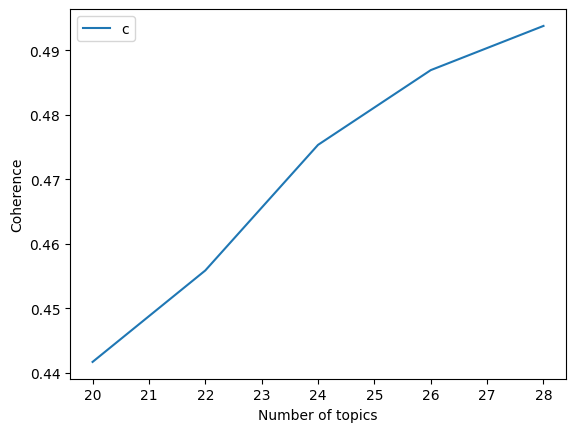

In [74]:
limit, start, step = 30, 20, 2
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of topics")
plt.ylabel("Coherence")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [75]:
index = coherence_values.index(max(coherence_values))
model_list[index].show_topics()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(24,
  '0.003*"league" + 0.002*"worst" + 0.002*"miami" + 0.002*"would" + 0.002*"literally" + 0.002*"happen" + 0.002*"likely" + 0.002*"going" + 0.002*"american" + 0.002*"sport"'),
 (23,
  '0.003*"miami" + 0.003*"best" + 0.003*"look" + 0.003*"like" + 0.002*"inter" + 0.002*"player" + 0.002*"people" + 0.002*"ronaldo" + 0.002*"nba" + 0.002*"million"'),
 (27,
  '0.002*"big" + 0.002*"people" + 0.002*"team" + 0.002*"hurricane" + 0.002*"around" + 0.002*"game" + 0.002*"toprightmessi" + 0.002*"fucking" + 0.002*"really" + 0.002*"know"'),
 (18,
  '0.003*"city" + 0.003*"yeah" + 0.002*"loss" + 0.002*"class" + 0.002*"fun" + 0.002*"cleansheet" + 0.002*"leaf" + 0.002*"madrid" + 0.002*"united" + 0.002*"tottenham"'),
 (6,
  '0.003*"overrated" + 0.002*"time" + 0.002*"england" + 0.002*"want" + 0.002*"beckham" + 0.002*"sport" + 0.002*"think" + 0.002*"bro" + 0.002*"day" + 0.002*"get"'),
 (8,
  '0.003*"follower" + 0.003*"team" + 0.002*"actually" + 0.002*"account" + 0.002*"million" + 0.002*"football" + 0.002*"

In [76]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus_tfidf, num_topics=28, id2word = dictionary, passes=20)
import pprint
pprint.pprint(ldamodel.top_topics(corpus_tfidf,topn=5))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[([(0.009630807, 'nba'),
   (0.008328316, 'college'),
   (0.0074184965, 'popular'),
   (0.006853475, 'football'),
   (0.0061902604, 'nfl')],
  -1.5047089135152536),
 ([(0.013481115, 'america'),
   (0.011324092, 'latin'),
   (0.01050559, 'city'),
   (0.010018778, 'think'),
   (0.0086410865, 'american')],
  -1.6696866893199798),
 ([(0.0082783075, 'follower'),
   (0.008212063, 'played'),
   (0.008029738, 'team'),
   (0.0060331183, 'player'),
   (0.005834352, 'lebron')],
  -2.701554874596458),
 ([(0.008259003, 'miami'),
   (0.006664398, 'lol'),
   (0.005995877, 'team'),
   (0.005452664, 'messi'),
   (0.0054263626, 'million')],
  -4.64534175505256),
 ([(0.010563377, 'beckham'),
   (0.008549529, 'wanted'),
   (0.007789363, 'messi'),
   (0.0061103003, 'david'),
   (0.005379572, 'really')],
  -9.062140620327323),
 ([(0.0067774467, 'communication'),
   (0.0056304242, 'world'),
   (0.005247306, 'miami'),
   (0.005016575, 'thing'),
   (0.0049165413, 'cup')],
  -10.239218903700088),
 ([(0.00524277

In [77]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus_tfidf, dictionary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
5     -0.097159 -0.051373       1        1  6.286466
2     -0.130301 -0.073070       2        1  6.266898
19    -0.085298  0.105230       3        1  6.104017
8     -0.021988  0.023185       4        1  4.262402
16     0.002067  0.048422       5        1  4.151950
10    -0.021445  0.026366       6        1  4.107387
27    -0.000454  0.057449       7        1  4.082598
9      0.010259 -0.017686       8        1  3.914211
23    -0.015624 -0.025417       9        1  3.858782
4      0.007852  0.037416      10        1  3.797244
20    -0.015948  0.019853      11        1  3.627860
18    -0.023888  0.023879      12        1  3.529835
24     0.024595 -0.013998      13        1  3.428982
12    -0.010686 -0.023498      14        1  3.407998
26     0.026370 -0.025881      15        1  3.104488
0      0.011939 -0.011851      16        1  3.094145
21     0.014075 -0.008255      17        1  3.041854
1      0.018753 -0.007390      18        1  2.992256
22     0.033436 -0.015816      19        1  2.972436
6      0.016524  0.011719      20        1  2.918867
11     0.041537 -0.005503      21        1  2.902718
7      0.011725 -0.013392      22        1  2.865371
25     0.025382  0.010822      23        1  2.855136
14     0.031550 -0.001248      24        1  2.749005
15     0.035562 -0.031919      25        1  2.637891
17     0.033467 -0.020631      26        1  2.468637
3      0.037990 -0.009752      27        1  2.457960
13     0.039708 -0.007663      28        1  2.112606, topic_info=         Term      Freq     Total Category  logprob  loglift
1381    night  5.000000  5.000000  Default  30.0000  30.0000
1793    stoke  4.000000  4.000000  Default  29.0000  29.0000
1789     cold  4.000000  4.000000  Default  28.0000  28.0000
755   america  6.000000  6.000000  Default  27.0000  27.0000
2995    latin  3.000000  3.000000  Default  26.0000  26.0000
...       ...       ...       ...      ...      ...      ...
480     thing  0.241205  5.228153  Topic28  -5.9196   0.7811
241      know  0.249630  7.884526  Topic28  -5.8853   0.4046
221       day  0.228973  3.649958  Topic28  -5.9716   1.0884
62     player  0.239280  8.166570  Topic28  -5.9276   0.3271
553    either  0.209863  1.725750  Topic28  -6.0588   1.7503

[1567 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
1853      1  0.598367     achieved
1994     26  0.617753  acknowledge
143       1  0.248065     actually
143       3  0.248065     actually
1011      7  0.658752       africa
...     ...       ...          ...
193       3  0.138672         year
193       6  0.138672         year
259       1  0.304412          yes
1186      8  1.013838         zero
3675      2  0.663259       zidane

[534 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 3, 20, 9, 17, 11, 28, 10, 24, 5, 21, 19, 25, 13, 27, 1, 22, 2, 23, 7, 12, 8, 26, 15, 16, 18, 4, 14])

In [78]:
import pyLDAvis.gensim

lda_display = pyLDAvis.gensim.prepare(model_list[index], corpus_tfidf, dictionary, sort_topics = False)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
def format_topics_sentences(lda_model, corpus, data):
    sent_topics_df = pd.DataFrame()
    for i, row in enumerate(lda_model[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = lda_model.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df._append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [80]:
df_topic_sents_keywords = format_topics_sentences(model_list[index], corpus_tfidf, texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,7,0.6568,"acknowledge, inter, miami, people, game, bigge...","[stats, thread, remember, one, stat, post, all..."
1,1,7,0.4895,"acknowledge, inter, miami, people, game, bigge...","[missed, important, one, inter, miami, followe..."
2,2,23,0.6203,"miami, best, look, like, inter, player, people...","[followed, instagram, sport, team, north, amer..."
3,3,26,0.4337,"thank, messi, cup, curry, lebron, cold, stoke,...","[player, bigger, club, except, player, club]"
4,4,18,0.5267,"city, yeah, loss, class, fun, cleansheet, leaf...","[basketball, fan, really, put, impact, footbal..."
5,5,16,0.5855,"way, top, though, zidane, spanish, time, messi...","[find, interesting, galaxy, lafc, gained, lost..."
6,6,21,0.6041,"also, messi, balon, ml, seriously, think, beat...","[medium, power, messi, ronaldo, fucking, nut, ..."
7,7,14,0.6138,"love, team, messi, also, money, confused, happ...","[power, one, messi, level, medium, juggernaut,..."
8,8,27,0.4242,"big, people, team, hurricane, around, game, to...","[first, game, really, helped]"
9,9,10,0.4654,"team, know, think, fan, get, league, way, year...","[flashiest, team, time, still, shittest, team,..."


In [81]:
topic_counts = df_dominant_topic.Dominant_Topic.value_counts().sort_values(ascending=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: ignored

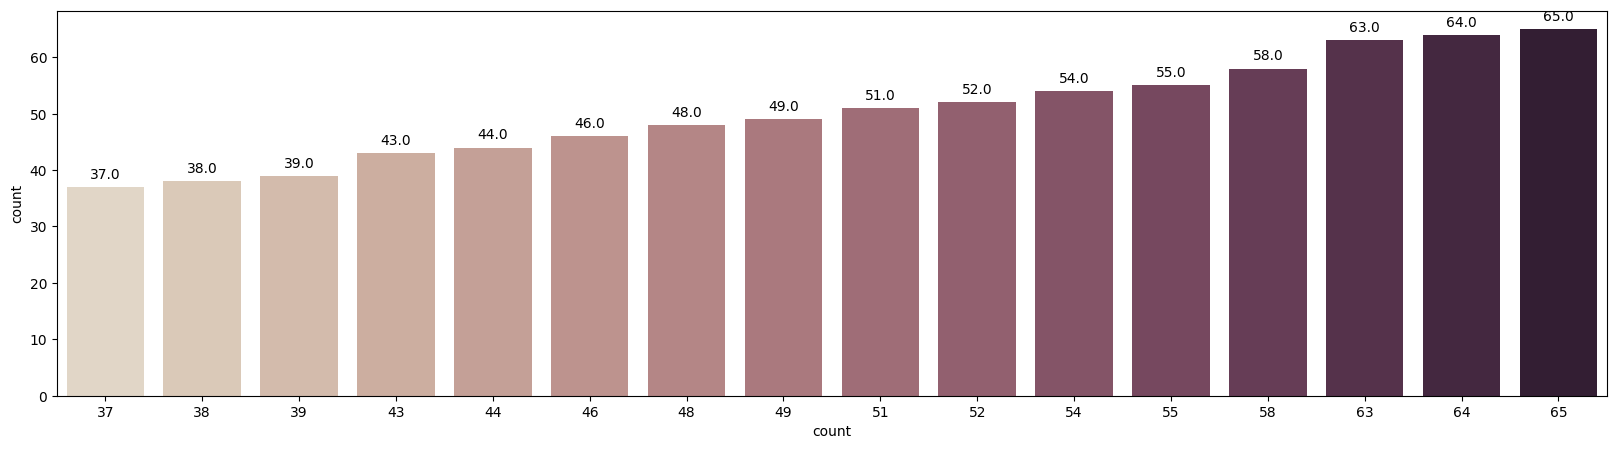

In [83]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x=topic_counts.index, y=topic_counts, data=topic_counts,  palette="ch:.25")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
ax = ax.set_xticklabels(topic_counts.index, rotation = 45, ha="right")

In [84]:
sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], axis=0)

sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]
sent_topics_sorteddf_mallet.head(28)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0,0.7022,"try, season, game, viewer, miami, coach, demog...","[oh, going, protected, like, crazy, gon, na, s..."
1,1,0.6463,"rm, would, lol, cleveland, team, cross, inter,...","[think, bad, manchester, red, new, castle, lee..."
2,2,0.7392,"whole, better, tear, time, beck, money, alive,...","[mean, ecw, ever, succeed, never, operated, pr..."
3,3,0.6124,"american, football, still, mate, south, fuckin...","[pretty, amazing, team, major, north, american..."
4,4,0.7225,"people, club, league, would, conference, messi...","[beckham, worked, hard, invested, lot, money, ..."
5,5,0.6963,"thing, messi, like, know, ball, one, player, t...","[sí, muchachos, vemos, en, miami, according, l..."
6,6,0.6756,"overrated, time, england, want, beckham, sport...","[everything, social, medium, lack, representat..."
7,7,0.6900,"acknowledge, inter, miami, people, game, bigge...","[gon, na, see, happen, nba, right, fee, think,..."
8,8,0.6951,"follower, team, actually, account, million, fo...","[yeah, kind, sounder, grew, playing, soccer, s..."
9,9,0.7064,"messi, thats, would, grows, cup, cry, ml, team...","[gone, several, game, graduated, medical, scho..."


In [85]:
#pyLDAvis.enable_notebook()
#pyLDAvis.gensim.prepare(lda, corpus, vocab)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## ***Sentiment Analysis***




In [86]:
 #import pandas as pd

#df_lex = pd.read_csv("2000.tsv", sep="\t", header=None)
#df_lex.columns=["word","sentiment", "std.dev"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#df_lex

In [88]:
#df_lex["sentiment"].plot(kind="hist", color="g",
          #               title="Frequency distribution of normalised sentiment score")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## ***Sentiment Analysis: VADER Model***

In [89]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

nltk.download('vader_lexicon')

sia = SIA()

#df = df[df["body"]].lower(str.contains("Messi"))]

def score(row):
  return sia.polarity_scores(row["cleaned_body"])["compound"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [90]:
df["vader_sentiment"] = df.apply(score, axis=1)
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,author,body,n_words,time,up_votes,chars,cleaned_body,lang,vader_sentiment
0,AutoModerator,**This is a stats thread. Remember that there'...,66,2023-07-24 23:07:05,1,406,stats thread . remember 's one stat post allow...,en,0.7088
1,MilesHighClub_,Missed the most important one\n\nInter Miami h...,13,2023-07-24 23:37:15,2775,78,missed important one inter miami follower inte...,en,-0.1027
2,ParisLake2,**The most followed (instagram) sports team in...,50,2023-07-24 23:08:38,1236,312,followed ( instagram ) sport team north americ...,en,0.0000
3,WelpSigh,"no player is bigger than the club, except this...",13,2023-07-24 23:42:47,900,67,"player bigger club , except player club",en,0.0000
4,sullivan_tire,"As a basketball fan, this really puts the impa...",15,2023-07-24 23:20:20,308,87,"basketball fan , really put impact football pe...",en,0.3182
...,...,...,...,...,...,...,...,...,...
1875,Diagonalizer,i think in today's world fewer people know who...,34,2023-07-22 18:39:42,2,183,think today 's world fewer people know alexand...,en,0.8807
1876,FifaIsGoingToKillMe,"Actually it’s fulbo, loco haha. I’ve been in t...",26,2023-07-22 15:22:31,9,124,"actually ’ fulbo , loco haha . ’ u life tend s...",en,0.2732
1877,eri-,"No worries, its an academic exercise pretty mu...",39,2023-07-22 16:14:51,0,217,"worry , academic exercise pretty much , since ...",en,0.3818
1880,neikawaaratake,Yeah. I am not saying Beckham was better. Zida...,62,2023-07-22 14:36:32,1,322,yeah . saying beckham better . zidane definite...,en,0.9844


In [92]:
df["vader_sentiment"].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    1376.000000
mean        0.237644
std         0.423022
min        -0.903500
25%         0.000000
50%         0.271350
75%         0.585900
max         0.989000
Name: vader_sentiment, dtype: float64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: ylabel='Frequency'>

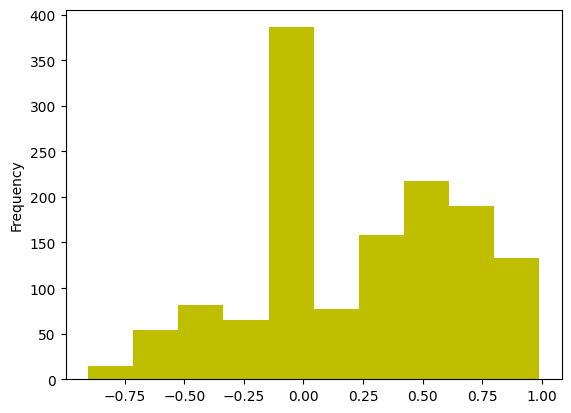

In [93]:
df["vader_sentiment"].plot(kind="hist",color="y")

In [94]:
df.sort_values(by="vader_sentiment",ascending=False).head(10)[["cleaned_body","vader_sentiment"]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,cleaned_body,vader_sentiment
1763,really interesting . completely disagree . opi...,0.9890
954,"end gilded era , watching messi play competiti...",0.9854
1764,"always player team better . figo , zidane , ro...",0.9851
1880,yeah . saying beckham better . zidane definite...,0.9844
62,would love see graph 2 year like - assume 'll ...,0.9747
795,"kind ? usually , expansion team u announced lo...",0.9729
1026,"’ serious , recommend keeping : fc cincinnati ...",0.9723
436,think two different definition popular . one d...,0.9716
1640,"totally , beauty football . messi , greatest t...",0.9713
1709,mean top win ? 18/29 club playoff could win ml...,0.9686


In [95]:
df.sort_values(by="vader_sentiment",ascending=True).head(10)[["cleaned_body","vader_sentiment"]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,cleaned_body,vader_sentiment
920,oh show chain insane . barely legal dope show ...,-0.9035
892,"libel law uk biased towards press . faithful ,...",-0.8834
827,bro literally cry 🐐ze scored v argentina . ten...,-0.8807
103,"doesnt like give interview , doesnt like talk ...",-0.8528
1355,yeah said ’ probably lose bet ’ anything ’ dam...,-0.8402
204,think ’ embarrassing dread day find loser club...,-0.8402
1238,holy shit would calling cop n't even trust lol,-0.8241
182,"based post world cup , india would destroy civ...",-0.8126
1710,"yeah , people like shit anything cynical take ...",-0.8018
804,"shhh , n't tell chelsea secret number 9 curse ...",-0.7783


In [96]:
df['category'] = df['vader_sentiment'].apply(lambda score: 1 if score > 0 else -1 if score < 0 else 0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [97]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,author,body,n_words,time,up_votes,chars,cleaned_body,lang,vader_sentiment,category
0,AutoModerator,**This is a stats thread. Remember that there'...,66,2023-07-24 23:07:05,1,406,stats thread . remember 's one stat post allow...,en,0.7088,1
1,MilesHighClub_,Missed the most important one\n\nInter Miami h...,13,2023-07-24 23:37:15,2775,78,missed important one inter miami follower inte...,en,-0.1027,-1
2,ParisLake2,**The most followed (instagram) sports team in...,50,2023-07-24 23:08:38,1236,312,followed ( instagram ) sport team north americ...,en,0.0000,0
3,WelpSigh,"no player is bigger than the club, except this...",13,2023-07-24 23:42:47,900,67,"player bigger club , except player club",en,0.0000,0
4,sullivan_tire,"As a basketball fan, this really puts the impa...",15,2023-07-24 23:20:20,308,87,"basketball fan , really put impact football pe...",en,0.3182,1
...,...,...,...,...,...,...,...,...,...,...
1875,Diagonalizer,i think in today's world fewer people know who...,34,2023-07-22 18:39:42,2,183,think today 's world fewer people know alexand...,en,0.8807,1
1876,FifaIsGoingToKillMe,"Actually it’s fulbo, loco haha. I’ve been in t...",26,2023-07-22 15:22:31,9,124,"actually ’ fulbo , loco haha . ’ u life tend s...",en,0.2732,1
1877,eri-,"No worries, its an academic exercise pretty mu...",39,2023-07-22 16:14:51,0,217,"worry , academic exercise pretty much , since ...",en,0.3818,1
1880,neikawaaratake,Yeah. I am not saying Beckham was better. Zida...,62,2023-07-22 14:36:32,1,322,yeah . saying beckham better . zidane definite...,en,0.9844,1


In [98]:
def cleanText(string):
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    cleanedText = ' '.join(''.join([i for i in string if not i.isdigit()]).split())

    for i in punc:
        cleanedText = cleanedText.replace(i, '')

    a = [i for i in cleanedText if i.isalpha() or i == ' ']

    final_text = ' '.join(''.join(a).split())
    return final_text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:2: DeprecationWarning: invalid escape sequence '\,'
<>:2: DeprecationWarning: invalid escape sequence '\,'
<ipython-input-98-bded1b157d00>:2: DeprecationWarning: invalid escape sequence '\,'
  punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''


In [99]:
df = df.dropna(how='any')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [100]:
df.category = df.category.apply(lambda x: int(x))

df.body = df.body.apply(cleanText)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [101]:
df.drop_duplicates(subset='body', keep=False, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [105]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1368, 10)

In [102]:
negative_avg = int(sum([len(i) for i in df[df.category == -1].body]) / len(df[df.category == 1]))
neutral_avg = int(sum([len(i) for i in df[df.category == 0].body]) / len(df[df.category == 0]))
positive_avg = int(sum([len(i) for i in df[df.category == 1].body]) / len(df[df.category == 1]))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


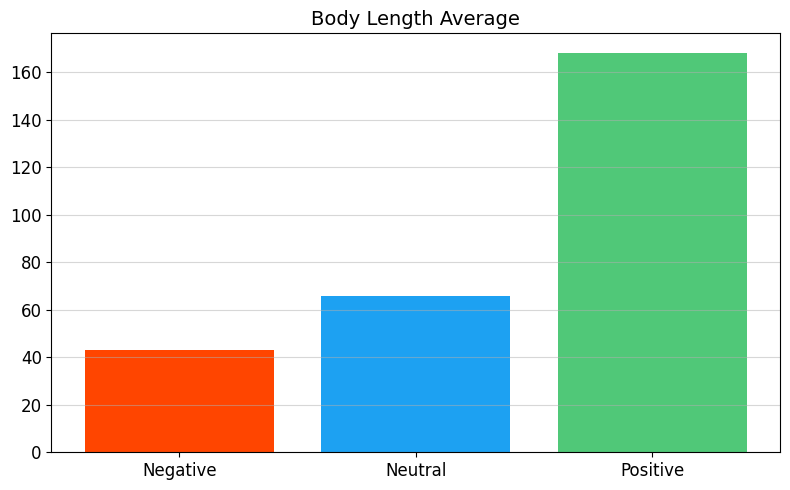

In [103]:
plt.figure(figsize=(8,5))
colors = ['#ff4500', '#1DA1F2', '#50C878']
plt.bar(['Negative', 'Neutral', 'Positive'], [negative_avg, neutral_avg, positive_avg], color=colors)

plt.title('Body Length Average', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', alpha=0.5)
plt.tight_layout()

In [108]:
from wordcloud import WordCloud, STOPWORDS
negative_words = ''
neutral_words = ''
positive_words = ''

stopwords = set(STOPWORDS)

for comment, category in zip(df.body, df.category):
    tokens = comment.split()

    for word in tokens:
        if category == -1:
            negative_words += word + ' '
        elif category == 0:
            neutral_words += word + ' '
        else:
            positive_words += word + ' '

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [109]:
negative_cloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(negative_words)

neutral_cloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(neutral_words)

positive_cloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(positive_words)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_si

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


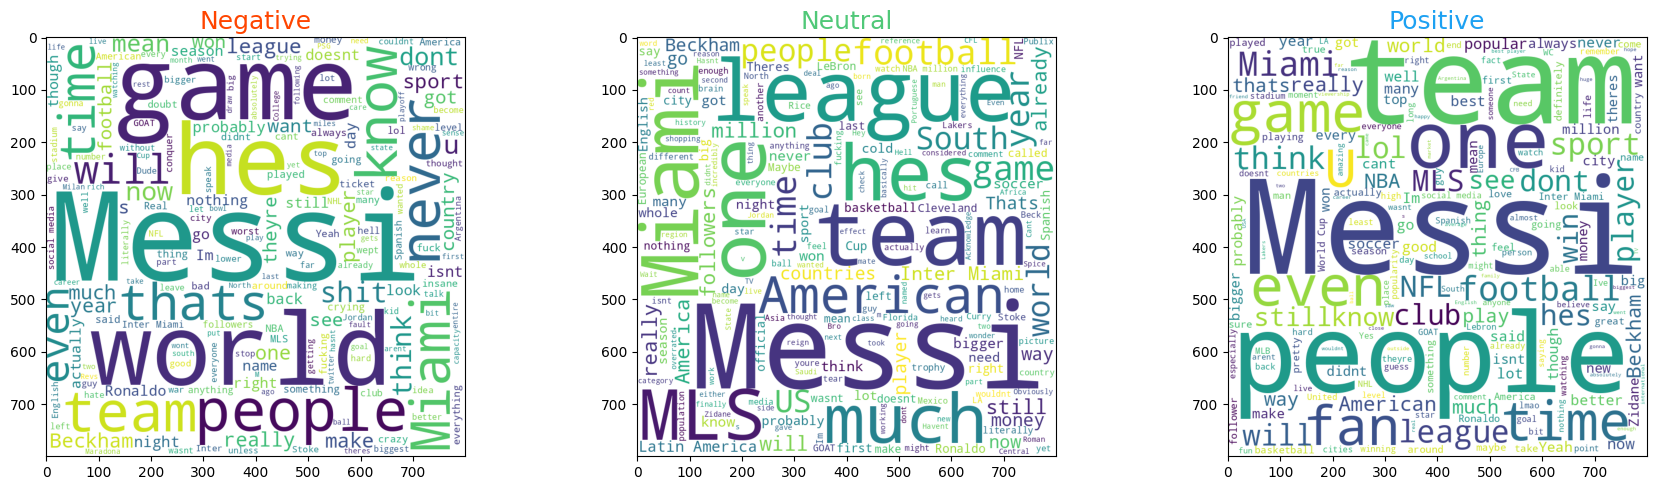

In [110]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), facecolor=None)

ax1.imshow(negative_cloud)
ax1.set_title('Negative', fontsize=18, color='#ff4500')


ax2.imshow(neutral_cloud)
ax2.set_title('Neutral', fontsize=18, color='#50C878')

ax3.imshow(positive_cloud)
ax3.set_title('Positive', fontsize=18, color='#1DA1F2')

plt.tight_layout()

In [113]:
class Data:
    def __init__(self, df):
        self.df = df

    def fixData(self):
        dataframe = self.df
        lowest_len = min([i for i in dataframe.category.value_counts()])

        # Create the final data frame
        final_df = pd.concat([df[dataframe.category == -1][:lowest_len],
                             df[dataframe.category == 0][:lowest_len],
                             df[dataframe.category == 1][:lowest_len]])

        # To shuffle the rows in the data frame
        final_df = final_df.sample(frac=1).reset_index(drop=True)
        return final_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [114]:
a = Data(df)
fixed_df = a.fixData()
print(f'Before: \n{df.category.value_counts()}\n')
print(f'After: \n{fixed_df.category.value_counts()}')

Before: 
category
 1    778
 0    340
-1    250
Name: count, dtype: int64

After: 
category
-1    250
 0    250
 1    250
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [116]:
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

train_X, test_X, train_y, test_y = train_test_split([i for i in fixed_df.body], [i for i in fixed_df.category], test_size=0.25, random_state=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [117]:
vectorizer = TfidfVectorizer()
train_X_vectors = vectorizer.fit_transform(train_X)
test_X_vectors = vectorizer.transform(test_X)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [118]:
clf_svm = LinearSVC()
clf_svm.fit(train_X_vectors, train_y)
clf_prediction = clf_svm.predict(test_X_vectors)

print(f'Accuracy: {clf_svm.score(test_X_vectors, test_y)}')
print(f'Accuracy: {f1_score(test_y, clf_prediction, average=None, labels=[2, 0, 1])}')

Accuracy: 0.6170212765957447
Accuracy: [0.         0.67213115 0.61313869]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [119]:
svm_mnb = MultinomialNB()
svm_mnb.fit(train_X_vectors, train_y)
mnb_prediction = svm_mnb.predict(test_X_vectors)

print(f'Accuracy: {svm_mnb.score(test_X_vectors, test_y)}')
print(f'Accuracy: {f1_score(test_y, mnb_prediction, average=None, labels=[-1, 0, 1])}')

Accuracy: 0.5531914893617021
Accuracy: [0.54098361 0.44444444 0.62195122]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [120]:
svm_dtc = DecisionTreeClassifier()
svm_dtc.fit(train_X_vectors, train_y)
dtc_prediction = svm_dtc.predict(test_X_vectors)

print(f'Accuracy: {svm_dtc.score(test_X_vectors, test_y)}')
print(f'Accuracy: {f1_score(test_y, dtc_prediction, average=None, labels=[-1, 0, 1])}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 0.526595744680851
Accuracy: [0.46031746 0.59541985 0.5210084 ]


In [121]:
tokenized_cleaned_body = df['cleaned_body'].apply(lambda x: x.split())
tokenized_cleaned_body.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    [stats, thread, ., remember, 's, one, stat, po...
1    [missed, important, one, inter, miami, followe...
2    [followed, (, instagram, ), sport, team, north...
3      [player, bigger, club, ,, except, player, club]
4    [basketball, fan, ,, really, put, impact, foot...
Name: cleaned_body, dtype: object

In [122]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(df['cleaned_body'].values.astype('U'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [124]:
from sklearn.model_selection import train_test_split
# Text preprocessing and feature extraction (using bag-of-words)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_body'])
#y = np.array(df['bayes_sentiment'])

#X=text_counts
y=df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=19)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [125]:
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from math import *
cnb = ComplementNB()
cnb.fit(X_train, y_train)
cross_cnb = cross_val_score(cnb, X, y,n_jobs = -1)
print("Cross Validation score = ",cross_cnb)
print ("Train accuracy ={:.2f}%".format(cnb.score(X_train,y_train)*100))
print ("Test accuracy ={:.2f}%".format(cnb.score(X_test,y_test)*100))
train_acc_cnb=cnb.score(X_train,y_train)
test_acc_cnb=cnb.score(X_test,y_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cross Validation score =  [0.55109489 0.61313869 0.54744526 0.57875458 0.59340659]
Train accuracy =91.86%
Test accuracy =55.84%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


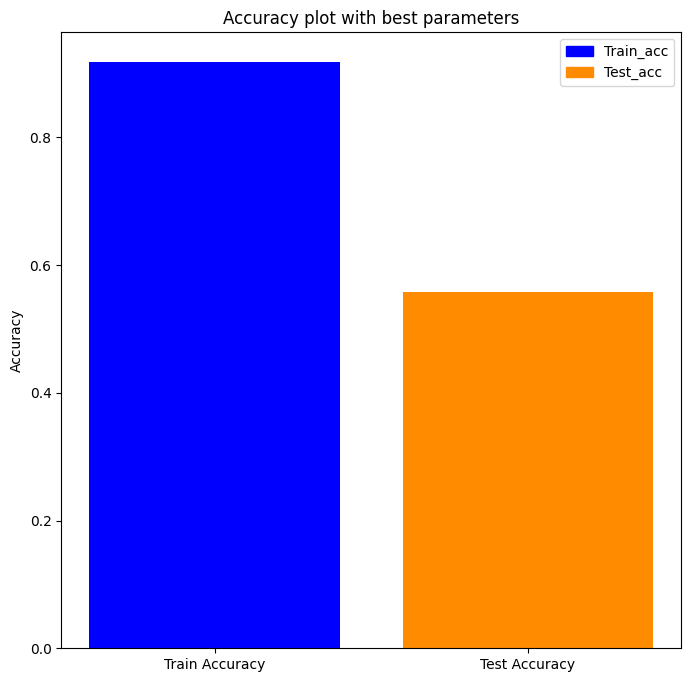

In [126]:
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
data_cnb = [train_acc_cnb,test_acc_cnb]
labels = ['Train Accuracy','Test Accuracy']
plt.xticks(range(len(data_cnb)), labels)
plt.ylabel('Accuracy')
plt.title('Accuracy plot with best parameters')
plt.bar(range(len(data_cnb)), data_cnb,color=['blue','darkorange'])
Train_acc = mpatches.Patch(color='blue', label='Train_acc')
Test_acc = mpatches.Patch(color='darkorange', label='Test_acc')
plt.legend(handles=[Train_acc, Test_acc],loc='best')
plt.gcf().set_size_inches(8, 8)
plt.show()

In [127]:
from sklearn.metrics import *
#Predict test data set
y_pred_cnb =cnb.predict(X_test)

#This is the confusion matrix :
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_cnb))

[[ 11   8  29]
 [ 12  16  36]
 [ 13  23 126]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [128]:
#Checking performance our model with classification report
print(classification_report(y_test, y_pred_cnb))

#Checking performance our model with ROC Score
roc_score_cnb=roc_auc_score(y_test, y_pred_cnb)
print("Area Under the Curve = ",roc_score_cnb)

              precision    recall  f1-score   support

          -1       0.31      0.23      0.26        48
           0       0.34      0.25      0.29        64
           1       0.66      0.78      0.71       162

    accuracy                           0.56       274
   macro avg       0.44      0.42      0.42       274
weighted avg       0.52      0.56      0.54       274



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: ignored

In [129]:
from sklearn.metrics import *

print("F1 score ={:.2f}%".format(f1_score(y_test, y_pred_cnb, average="macro")*100))
f1_cnb=f1_score(y_test, y_pred_cnb, average="macro")
print("Precision score ={:.2f}%".format(precision_score(y_test, y_pred_cnb, average="macro")*100))
precision_cnb=precision_score(y_test, y_pred_cnb, average="macro")
print("Recall score ={:.2f}%".format(recall_score(y_test, y_pred_cnb, average="macro")*100))
recall_cnb=recall_score(y_test, y_pred_cnb, average="macro")

F1 score =42.14%
Precision score =43.52%
Recall score =41.90%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [130]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np
fpr_dt_1, tpr_dt_1,_=roc_curve(y_test,cnb.predict_proba(X_test)[:,1])
plt.plot(fpr_dt_1,tpr_dt_1,label="ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.gcf().set_size_inches(8, 8)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: ignored

2

In [132]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Text preprocessing and feature extraction (using bag-of-words)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_body'])
y = np.array(df['category'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Predict sentiment labels for the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print detailed metrics
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 0.6167883211678832
              precision    recall  f1-score   support

          -1       0.48      0.27      0.34        49
           0       0.60      0.30      0.40        70
           1       0.64      0.87      0.74       155

    accuracy                           0.62       274
   macro avg       0.57      0.48      0.49       274
weighted avg       0.60      0.62      0.58       274



In [133]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
clf_svm = LinearSVC()
clf_svm.fit(X_train, y_train)
clf_prediction = clf_svm.predict(X_test)

print(f'Accuracy: {clf_svm.score(X_test, y_test)}')
print(f'Accuracy: {f1_score(y_test, clf_prediction, average=None, labels=[2, 0, 1])}')

Accuracy: 0.7007299270072993
Accuracy: [0.         0.72       0.79872204]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [134]:
svm_dtc = DecisionTreeClassifier()
svm_dtc.fit(X_train, y_train)
dtc_prediction = svm_dtc.predict(X_test)

print(f'Accuracy: {svm_dtc.score(X_test, y_test)}')
print(f'Accuracy: {f1_score(y_test, dtc_prediction, average=None, labels=[2, 0, 1])}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 0.708029197080292
Accuracy: [0.         0.72       0.80122324]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
